# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
import os
import sys
import csv
from datetime import datetime

# Used to navigate to project root for api_keys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Data File (CSV)
output_data_file = './output_data/cities.csv'

# Output Log File (CSV)
output_log_file = './output_data/weather_api_log.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List to holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save query information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Add weather detail columns
city_name = []
city_id = []
lat = []
lon = []
unix_dt = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []

# Create log file list and currentResponse variable
weather_api_log = []
current_city_returned = ''

### *Note:  The following code prints the log (line 14) to the console.  However, the log has been removed from the code block and captured in a .csv log file (lines 17 & 39) to save space when viewing code in git.*

### *Please see './output_data/weather_api_log.csv' for the log output.*

In [ ]:
# Call weather api for each city
for city in cities:
    try:
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        # Get weather data
        weather_response = requests.get(query_url).json()
        
        # Get current city information
        current_city_returned = f"City Name:  {city}, City Number:  {weather_response['id']}"
        
        # Print current city information to console
        print(current_city_returned)
        
        # Write weather_api_response to log
        weather_api_log.append(current_city_returned)
        
        # cityID, cityName, lat, lon, unix_dt, temp, humidity, cloudiness, windSpeed
        city_id.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        unix_dt.append(weather_response['dt'])
        temp_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
    
    # Catch Cities not returned by the api
    except:
        # Get current city information
        current_city_returned = 'City not found'
        
        # Print current city information to console
        print(current_city_returned)
        
        # Write weather_api_response to log
        weather_api_log.append(current_city_returned)
        
        # Continue with next city
        pass

In [5]:
# Print the city count to confirm sufficient dataset (500+)
len(city_name)

591

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save data to dataframe
city_weather_data = pd.DataFrame({
    'city_name':city_name,
    'city_id':city_id,
    'lat':lat,
    'lon':lon,
    'unix_dt':unix_dt,
    'temp_max_c':temp_max,
    'temp_max_f':list(map(lambda x: ((x * (9/5)) + 32), temp_max)),
    'humidity':humidity,
    'cloudiness':cloudiness,
    'windspeed':windspeed
})

# Save log to dataframe
weather_api_response_log = pd.DataFrame({pd.to_datetime('today'):weather_api_log})

# write city weather data to the csv
city_weather_data.to_csv(output_data_file, sep=',', encoding='utf-8', index=False)

# write the log to the csv
weather_api_response_log.to_csv(output_log_file, sep=',', encoding='utf-8', index=False)

# Display dataframe
city_weather_data

,city_name,city_id,lat,lon,unix_dt,temp_max_c,temp_max_f,humidity,cloudiness,windspeed
0,Punta Arenas,3874787,-53.15,-70.92,1579926794,9.00,48.200,87,20,5.70
1,Massaguet,2428231,12.48,15.44,1579926800,14.00,57.200,19,0,4.60
2,Kavieng,2094342,-2.57,150.80,1579926800,28.95,84.110,73,42,7.11
3,Lebu,3883457,-37.62,-73.65,1579926800,12.87,55.166,70,0,3.16
4,Bathsheba,3374083,13.22,-59.52,1579926800,26.00,78.800,78,20,4.60
...,...,...,...,...,...,...,...,...,...,...
586,Oistins,3373652,13.07,-59.53,1579926888,26.00,78.800,78,20,4.60
587,Lanzhou,1804430,36.06,103.79,1579926725,-3.00,26.600,63,0,4.00
588,Iralaya,3608828,15.00,-83.23,1579926888,25.11,77.198,70,31,6.44
589,Christchurch,2192362,-43.53,172.63,1579926774,27.00,80.600,47,94,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Load saved city weather data for analysis
city_weather_data_csv = './output_data/cities.csv'

# Read and display the CSV with Pandas
city_weather_data = pd.read_csv(city_weather_data_csv)
#city_weather_data.head()

In [8]:
# Create 'plotScatter' function to draw a scatter plot and save the image to the './output' directory
def plotScatter(x_values, y_values, x_label, y_label, image_title, png_file_name, timestamp):
    
    # Date capture timestamp
    date_time = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    
    # Plot the 'x' vs 'y' scatter plot
    plt.scatter(x_values, y_values, marker='o', color='blue')
    
    # Print chart title, x-axis label, and y-axis label
    plt.title(f'{image_title}\n({date_time})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot and display it
    plt.savefig(f'./output_data/{png_file_name}.png')
    plt.show()


#### Temperature (F) vs. Latitude Plot

In [9]:
# Initialize variables for city weather data set
lattitude = city_weather_data['lat']
data_capture_datetime = city_weather_data['unix_dt'][0]

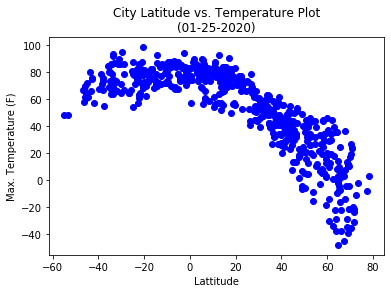

In [10]:
# Call the 'plotScatter' function to plot Lattitute vs. Max Temperature (F)
plotScatter(
    lattitude, # x_values
    city_weather_data['temp_max_f'], # y_values
    'Lattitude', # x_label
    'Max. Temperature (F)', # y_label
    'City Latitude vs. Temperature Plot', # image_title
    'lattitude_vs_temperature_scatter', # image_file_name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Humidity (%) vs. Latitude Plot

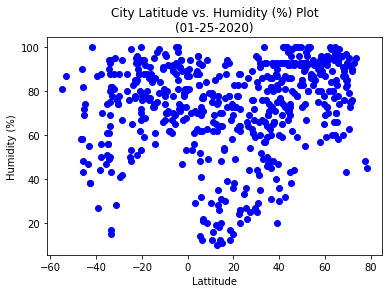

In [11]:
# Call the 'plotScatter' function to plot Lattitute vs. Humidity
plotScatter(
    lattitude,
    city_weather_data['humidity'],
    'Lattitude',
    'Humidity (%)',
    'City Latitude vs. Humidity (%) Plot',
    'lattitude_vs_humidity_scatter',
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Cloudiness (%) vs. Latitude Plot

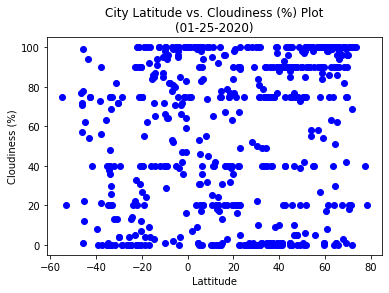

In [12]:
# Call the 'plotScatter' function to plot Lattitute vs. Cloudiness
plotScatter(
    lattitude,
    city_weather_data['cloudiness'],
    'Lattitude',
    'Cloudiness (%)',
    'City Latitude vs. Cloudiness (%) Plot',
    'lattitude_vs_cloudiness_scatter',
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Wind Speed (mph) vs. Latitude Plot

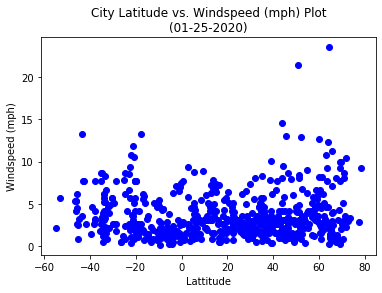

In [13]:
# Call the 'plotScatter' function to plot Lattitute vs. Windspeed
plotScatter(
    lattitude,
    city_weather_data['windspeed'],
    'Lattitude',
    'Windspeed (mph)',
    'City Latitude vs. Windspeed (mph) Plot',
    'lattitude_vs_windspeed_scatter',
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotScatterWithLinearRegression(x_values, y_values, x_label, y_label, image_title, png_file_name, timestamp):
    
    # Date capture timestamp
    date_time = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    
    # Perform a linear regression on x_regression_value versus y_regression_value
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_values, y_values)
    
    # Create equation of line
    vc_fit = vc_slope * x_values + vc_int
    
    # Plot the 'x' vs 'y' scatter plot
    plt.scatter(x_values, y_values, marker='o', color='blue')
    #plt.scatter(x_values,y_values)
    
    # Plot the linear model on top of scatter plot
    plt.plot(x_values,vc_fit,"r-")
    
    # Print chart title, x-axis label, and y-axis label
    plt.title(f"{image_title}\n({date_time})")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot and display it
    plt.savefig(f"./output_data/{png_file_name}.png")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemi_weather_data = city_weather_data[city_weather_data['lat'] >= 0]
# Southern Hemisphere (less than 0 degrees latitude)
south_hemi_weather_data = city_weather_data[city_weather_data['lat'] < 0]

# Create Northern and Southern Hemisphere Lattitude vairables
north_hemi_lattitude = north_hemi_weather_data['lat']
south_hemi_lattitude = south_hemi_weather_data['lat']

####  Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

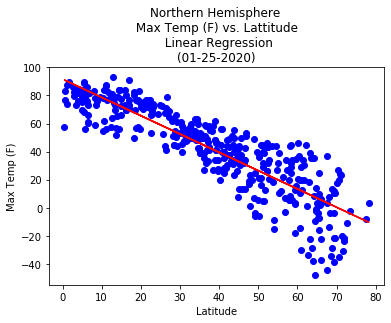

In [16]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    north_hemi_lattitude, # x_value
    north_hemi_weather_data['temp_max_f'], # y_value
    'Latitude', # x_label
    'Max Temp (F)', # y_label
    'Northern Hemisphere \n Max Temp (F) vs. Lattitude \n Linear Regression', # Image title
    'north_hemisphere_temperature_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

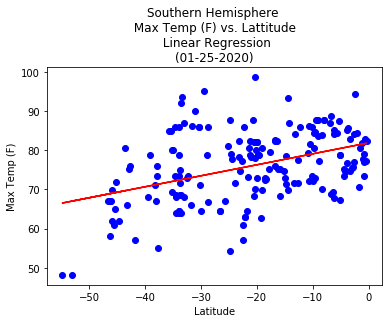

In [17]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    south_hemi_lattitude, # x_value
    south_hemi_weather_data['temp_max_f'], # y_value
    'Latitude', # x_label
    'Max Temp (F)', # y_label
    'Southern Hemisphere \n Max Temp (F) vs. Lattitude \n Linear Regression', # Image title
    'south_hemisphere_temperature_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

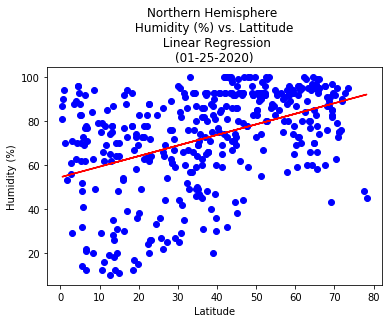

In [18]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    north_hemi_lattitude, # x_value
    north_hemi_weather_data['humidity'], # y_value
    'Latitude', # x_label
    'Humidity (%)', # y_label
    'Northern Hemisphere \n Humidity (%) vs. Lattitude \n Linear Regression', # Image title
    'north_hemisphere_humidity_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

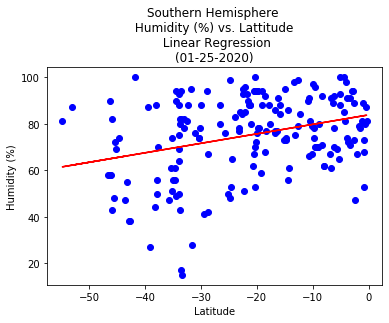

In [19]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    south_hemi_lattitude, # x_value
    south_hemi_weather_data['humidity'], # y_value
    'Latitude', # x_label
    'Humidity (%)', # y_label
    'Southern Hemisphere \n Humidity (%) vs. Lattitude \n Linear Regression', # Image title
    'south_hemisphere_humidity_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

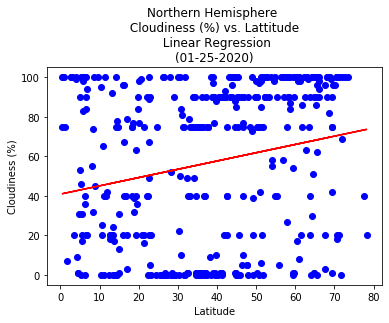

In [20]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    north_hemi_lattitude, # x_value
    north_hemi_weather_data['cloudiness'], # y_value
    'Latitude', # x_label
    'Cloudiness (%)', # y_label
    'Northern Hemisphere \n Cloudiness (%) vs. Lattitude \n Linear Regression', # Image title
    'north_hemisphere_cloudiness_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

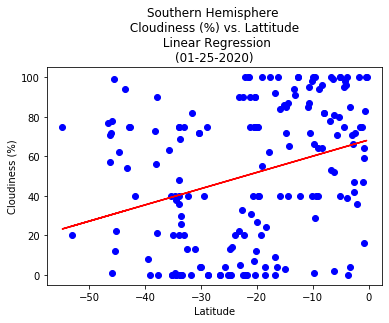

In [21]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    south_hemi_lattitude, # x_value
    south_hemi_weather_data['cloudiness'], # y_value
    'Latitude', # x_label
    'Cloudiness (%)', # y_label
    'Southern Hemisphere \n Cloudiness (%) vs. Lattitude \n Linear Regression', # Image title
    'south_hemisphere_cloudiness_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

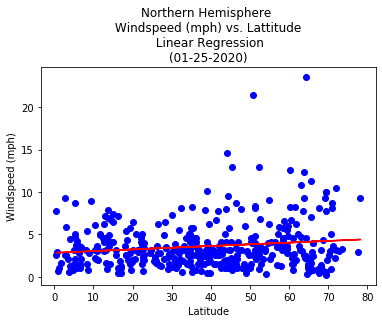

In [22]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    north_hemi_lattitude, # x_value
    north_hemi_weather_data['windspeed'], # y_value
    'Latitude', # x_label
    'Windspeed (mph)', # y_label
    'Northern Hemisphere \n Windspeed (mph) vs. Lattitude \n Linear Regression', # Image title
    'north_hemisphere_windspeed_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

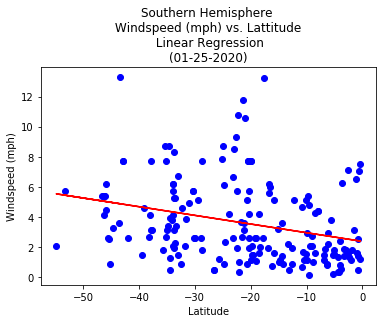

In [23]:
# Call the 'plotScatterWithLinearRegression' function
plotScatterWithLinearRegression(
    south_hemi_lattitude, # x_value
    south_hemi_weather_data['windspeed'], # y_value
    'Latitude', # x_label
    'Windspeed (mph)', # y_label
    'Southern Hemisphere \n Windspeed (mph) vs. Lattitude \n Linear Regression', # Image title
    'south_hemisphere_windspeed_vs_lattitude', # .png file name
    data_capture_datetime
)

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

In [ ]:
def getFirstIdealHotelLoc(target_coordinates):
    
    # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # initialize parms
    target_radius = 5000
    target_type = "lodging"
    fields = "address_component"
    
    # create parms list
    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "fields": fields,
        "key": g_key
    }
    
    # run a request using our params dictionary
    response = requests.get(base_url, params=params)
    
    # convert response to json
    places_data = response.json()
    
    # initialize to '0' to capture first hotel returned in dataset
    index = 0
    
    # Isolate leading text in compound code (full address)
    # help parsing the full address to return only the city
    leadingText = places_data["results"][index]['plus_code']['compound_code'].split()[0]

    # hotel name, city, and country
    lodging = places_data["results"][index]['name']
    city = places_data["results"][index]['plus_code']['compound_code'].split(leadingText)[1].split(',')[0]
    country = places_data["results"][index]['plus_code']['compound_code'].split(',')[2]
